In [1]:
import cv2, sys

In [2]:
from matplotlib import pyplot as plt

In [3]:
import numpy as np

In [4]:
image = cv2.imread('sign1.jpg')

In [5]:
image_gray = cv2.imread('sign1.jpg', cv2.IMREAD_GRAYSCALE)

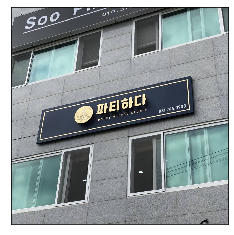

In [6]:
#주피터 노트북에서 이미지 보이게 하기
b,g,r = cv2.split(image)
image2 = cv2.merge([r,g,b])

plt.imshow(image2)
plt.xticks([])
plt.yticks([])
plt.show()

In [7]:
#윈도우 창에 띄우기
cv2.imshow('image',image)
cv2.imshow('image_gray', image_gray)

cv2.waitKey(0) #시간 단위는 ms
cv2.destroyAllWindows()

In [7]:
blur = cv2.GaussianBlur(image_gray, ksize=(7,7), sigmaX = 0)

In [8]:
ret, thresh1 = cv2.threshold(blur, 127, 255, cv2.THRESH_BINARY)

In [10]:
edged = cv2.Canny(blur, 10, 250)

In [ ]:
cv2.imshow('Edged', edged)
cv2.waitKey(0)

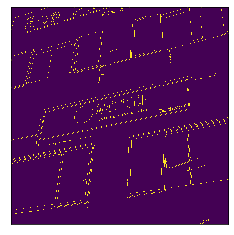

In [11]:
plt.imshow(edged)
plt.xticks([])
plt.yticks([])
plt.show()

In [12]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (7,7))
closed = cv2.morphologyEx(edged, cv2.MORPH_CLOSE, kernel)

In [ ]:
cv2.imshow('closed', closed)
cv2.waitKey(5000)

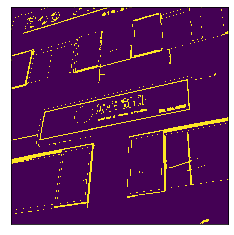

In [13]:
plt.imshow(closed)
plt.xticks([])
plt.yticks([])
plt.show()

In [14]:
contours, _ = cv2.findContours(closed.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
total = 0

In [15]:
contours_image = cv2.drawContours(image, contours, -1, (0,255,0),3)

In [ ]:
cv2.imshow('contours_image', contours_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

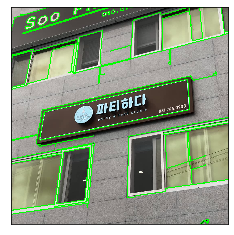

In [16]:
plt.imshow(contours_image)
plt.xticks([])
plt.yticks([])
plt.show()

In [17]:
contours_xy = np.array(contours)
contours_xy.shape

(20,)

In [18]:
# x의 min과 max 찾기
x_min, x_max = 0,0
value = list()
for i in range(len(contours_xy)):
    for j in range(len(contours_xy[i])):
        value.append(contours_xy[i][j][0][0]) #네번째 괄호가 0일때 x의 값
        x_min = min(value)
        x_max = max(value)
print(x_min)
print(x_max)
 
# y의 min과 max 찾기
y_min, y_max = 0,0
value = list()
for i in range(len(contours_xy)):
    for j in range(len(contours_xy[i])):
        value.append(contours_xy[i][j][0][1]) #네번째 괄호가 0일때 x의 값
        y_min = min(value)
        y_max = max(value)
print(y_min)
print(y_max)


0
1079
0
1081


In [17]:
# image trim 하기
x = x_min
y = y_min
w = x_max-x_min
h = y_max-y_min

In [19]:
img_trim = image[y:y+h, x:x+w]
cv2.imwrite('org_trim.jpg', img_trim)
org_image = cv2.imread('org_trim.jpg')

In [20]:
cv2.imshow('org_image', org_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

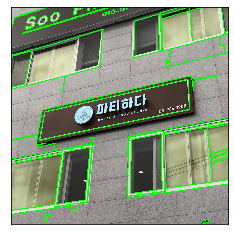

In [24]:
plt.imshow(org_image)
plt.xticks([])
plt.yticks([])
plt.show()